# Coronavirus Graphs

Hywel Owen
9th March 2020

This Jupyter notebook is supplied free for use for educational purposes. There is no implied fitness for use for any purpose. In particular, you should not be using this notebook for predictive purposes. 

You may share and re-use this notebook according to the Creative Commons License Attribution ShareAlike (CC BY-SA) license, as described in https://creativecommons.org/use-remix/cc-licenses/  
<img src="https://licensebuttons.net/l/by-sa/4.0/88x31.png" align="left">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## Manually-Collected Data from Wikipedia and NHC Sites

In [55]:
# Data sourced from:
# https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_outbreak_in_February_2020
# and
# https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_outbreak_in_March_2020
# and for China
# http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
# Some data updated 9th March 2020

days_uk = np.array([1,2,3,4,5,6,7,8,9]) # Days in March
cases_uk = np.array([35,39,51,87,116,163,206,273,317]) # UK Confirmed Cases in March 

days_germany =np.array( [25, 26, 27, 28, 29,29+1,29+2,29+3,29+4,29+5,29+6,29+7,29+8,29+9])# Days since 1st February
cases_germany = np.array([18, 27, 45, 60, 66, 129,150,180,262,349,639,800,1018,1176]) # Germany Confirmed Cases 

days_france =np.array( [1,2,3,4,5,6,7,8,9])# Days in March
cases_france = np.array([130,191,212,285,377,567,949,1126,1209]) # France Confirmed Cases in March 

days_italy =np.array( [21, 22, 23, 24, 25, 26, 27, 28, 29+1,29+2,29+3,29+4,29+5,29+6,29+7,29+8,29+9]) # Days since 1st February
cases_italy = np.array([20, 79, 152, 229, 323, 374, 655, 888, 1694,2064,2502,3089,3850,4628,5875,7375,9172]) # Italy Confirmed Cases
deaths_italy = np.array([1,2,3,7,12,17,21,29,34,52,80,107,148,197,233,366]) # Italy Confirmed Deaths

days_usa =np.array( [20,21,24,26,28,29,29+1,29+2,29+3,29+4,29+5,29+6,29+7,29+8]) # Days since 1st February
cases_usa = np.array([16,35,53,60,66,68,89,102,126,159,228,332,444,483])

days_skorea =np.array( [11,16,17,18,19,20,21,22,23,24,25,26,27,28,29, 29+1,29+2,29+3,29+4,29+5,29+7,29+8,29+9]) # Days since 1st February
cases_skorea = np.array([28,29,30,31,51,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,5766,7041,7134,7478])

days_china =np.array( [-31+9,-31+17,-31+18,-31+19,-31+20,-31+21,-31+22,-31+23,-31+25,-31+26,-31+27,-31+28,-31+29,-31+30,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,18,20,22,24,26,28,29+1,29+3,29+4,29+5,29+6,29+7])# Days since 1st February
cases_china = np.array([41,45,62,201,218,291,571,628,1975,2744,4515,5974,7711,9692,11791,14380,17205,20438,24324,28018,31161,33738,35982,37726,38800,44653,55748,57416,68500,70548,74185,75465,76936,77658,78497,79251,80026,80270,80409,80552,80651,80695]) # China Confirmed Cases 

days_iran =np.array( [19,20,21,22,23,24,25,26,27,28,29,29+1,29+2,29+3,29+5,29+6,29+7,29+8,29+9]) # Days since 1st February
cases_iran = np.array([2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,3513,4747,5823,6566,7161]) # Iran Confirmed Cases

days_india =np.array( [2,4,5,6,8,9])# Days in March
cases_india = np.array([6,29,30,31,39,44]) # India Confirmed Cases in March 



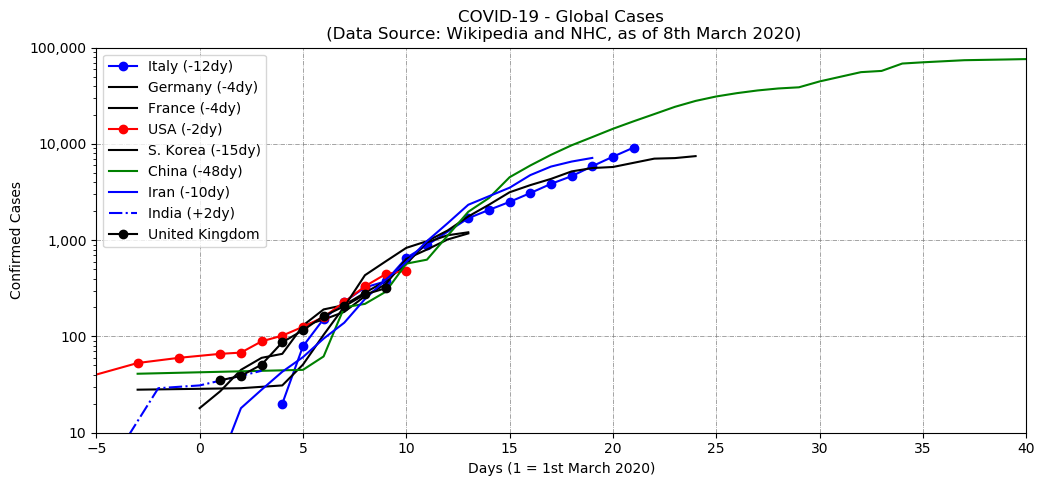

In [57]:
plt.figure(figsize=(12,5))
plt.plot(days_italy-29+12, cases_italy,'bo-')
plt.plot(days_germany-29+4, cases_germany,'k-')
plt.plot(days_france+4, cases_france,'k-')
plt.plot(days_usa-29+2, cases_usa,'ro-')
plt.plot(days_skorea-29+15, cases_skorea,'k-')
plt.plot(days_china-29+48, cases_china,'g-')
plt.plot(days_iran-29+10, cases_iran,'b-')
plt.plot(days_india-6, cases_india,'b-.')
plt.plot(days_uk, cases_uk,'ko-')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(10,5000)
plt.xlim(0,20)
plt.xticks(np.linspace(-5,40,10))
plt.yticks([10,100,1000,10000,1e5],['10','100','1,000','10,000','100,000'])
plt.xlabel('Days (1 = 1st March 2020)')
plt.ylabel('Confirmed Cases')
plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','USA (-2dy)','S. Korea (-15dy)','China (-48dy)','Iran (-10dy)','India (+2dy)','United Kingdom'])
plt.title('COVID-19 - Global Cases\n (Data Source: Wikipedia and NHC, as of 8th March 2020)')
plt.savefig("coronaviruscases.png")

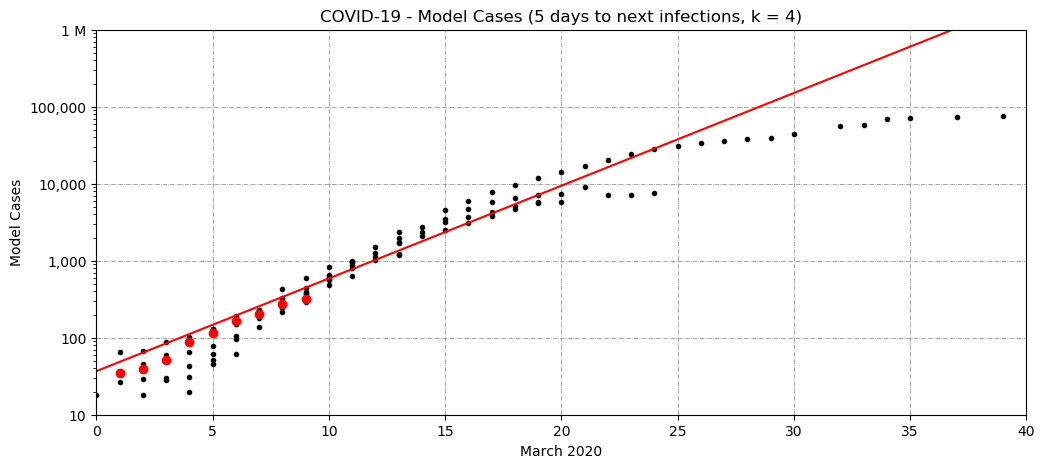

In [67]:
# This model should NOTE be used for any predictive purposes. This is NOT an epidemiology model.
# There is NO implied fitness of use for this code.
#
# WHO figures for incubation period
# https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200306-sitrep-46-covid-19.pdf?sfvrsn=96b04adf_2
#
inc_period = 5 # WHO estimate of incubation period before next infection
# inf_mult = 2.5 # WHO reproductive number - looks too low!
inf_mult = 4 # Assumed reproductive number - fits the data better
n_periods = 20 # How many incubation periods we will calculate for
model_days = np.zeros(n_periods)
model_infections = np.zeros(n_periods)
model_infections[0] = 1 # Patient zero!
for i in range(1,n_periods):
    model_days[i] = model_days[i-1] + inc_period
    # Each infected person infects inf_mult more people
    model_infections[i] = model_infections[i-1] * inf_mult
    
# print(model_days)
# print(model_infections)
plt.figure(figsize=(12,5))
plt.plot(days_italy-29+12, cases_italy,'k.')
plt.plot(days_germany-29+4, cases_germany,'k.')
plt.plot(days_france+4, cases_france,'k.')
plt.plot(days_usa-29+2, cases_usa,'k.')
plt.plot(days_skorea-29+15, cases_skorea,'k.')
plt.plot(days_china-29+48, cases_china,'k.')
plt.plot(days_iran-29+10, cases_iran,'k.')
plt.plot(days_uk, cases_uk,'ro')
plt.plot(model_days-13, model_infections,'r-')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(10,1e6)
plt.xlim(0,20)
plt.xticks(np.linspace(0,40,9))
plt.yticks([10,100,1000,10000,1e5,1e6],['10','100','1,000','10,000','100,000','1 M'])
plt.xlabel('March 2020')
plt.ylabel('Model Cases')
#plt.legend(['Italy (- 12 days)','Germany (- 4 days)','France (- 4 days)','United Kingdom'])
plt.title('COVID-19 - Model Cases (' + str(inc_period) + ' days to next infections, k = ' + str(inf_mult) + ')')
plt.savefig("coronavirusvirusmodel.png")

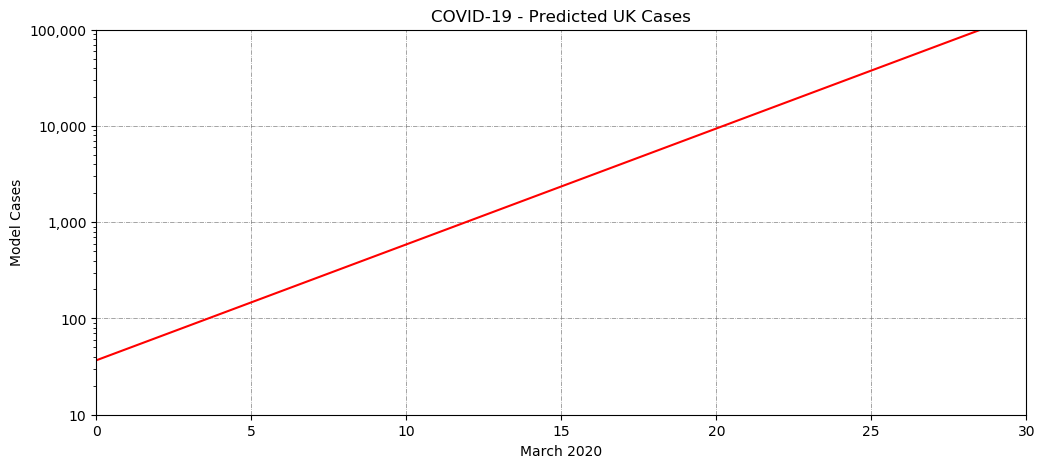

In [5]:
plt.figure(figsize=(12,5))
plt.plot(model_days-13, model_infections,'r-')
plt.yscale('log')
plt.ylim(10,1e4)
plt.xlim(0,20)
plt.xticks(np.linspace(0,30,7))
plt.yticks([10,100,1000,10000,1e5],['10','100','1,000','10,000','100,000'])
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.xlabel('March 2020')
plt.ylabel('Model Cases')
plt.title('COVID-19 - Predicted UK Cases')
plt.savefig("coronavirusvirusmodel.png")

## Automatically Collecting Data

Here, we collect data from the Johns Hopkins CSSE COVID-19 data repository, which is here:
https://github.com/CSSEGISandData/COVID-19  
  
The main data visualisation for this repository is here:
https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html



In [73]:
# Read data direct from COVID-19 database
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

confirmed_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
covid_confirmed_df = pd.read_csv(confirmed_data_url,error_bad_lines=False)

deaths_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
covid_deaths_df = pd.read_csv(deaths_data_url,error_bad_lines=False)    

In [90]:
# Extract data_frame values into values for plotting
df_cases_skorea = covid_confirmed_df.values[33][4::]
df_cases_france = covid_confirmed_df.values[41][4::]
df_cases_germany = covid_confirmed_df.values[52][4::]
df_cases_india = covid_confirmed_df.values[56][4::]
df_cases_italy = covid_confirmed_df.values[58][4::]
df_cases_uk = covid_confirmed_df.values[59][4::]
df_cases_spain = covid_confirmed_df.values[62][4::]
df_cases_iran = covid_confirmed_df.values[71][4::]
df_cases_switzerland = covid_confirmed_df.values[87][4::]
df_cases_southafrica = covid_confirmed_df.values[160][4::]
df_cases_czechrepublic = covid_confirmed_df.values[116][4::]
df_cases_hongkong = covid_confirmed_df.values[38][4::]
df_cases_sweden = covid_confirmed_df.values[61][4::]
df_cases_belgium = covid_confirmed_df.values[65][4::]
df_cases_japan = covid_confirmed_df.values[32][4::]
df_cases_norway = covid_confirmed_df.values[95][4::]
# Australian data is spread through the database
df_cases_australia = covid_confirmed_df.values[47][4::] + covid_confirmed_df.values[48][4::] \
 + covid_confirmed_df.values[48][4::] + covid_confirmed_df.values[63][4::] \
 + covid_confirmed_df.values[74][4::] + covid_confirmed_df.values[108][4::] \
 + covid_confirmed_df.values[122][4::] + covid_confirmed_df.values[147][4::]

# Find number of columns in the DataFrame
number_of_csv_columns = np.size(covid_confirmed_df.values[0])
# Loop over the cases columns and sum over the countries in China
df_cases_china = [covid_confirmed_df.values[0:30][:,i].sum() for i in range(4,number_of_csv_columns)]

df_cases_world = [covid_confirmed_df.values[0:254][:,i].sum() for i in range(4,number_of_csv_columns)]

# Extract data_frame values into values for plotting
df_deaths_skorea = covid_deaths_df.values[33][4::]
df_deaths_france = covid_deaths_df.values[41][4::]
df_deaths_germany = covid_deaths_df.values[52][4::]
df_deaths_india = covid_deaths_df.values[56][4::]
df_deaths_italy = covid_deaths_df.values[58][4::]
df_deaths_uk = covid_deaths_df.values[59][4::]
df_deaths_spain = covid_deaths_df.values[62][4::]
df_deaths_iran = covid_deaths_df.values[71][4::]
df_deaths_switzerland = covid_deaths_df.values[87][4::]
df_deaths_southafrica = covid_deaths_df.values[160][4::]
df_deaths_czechrepublic = covid_deaths_df.values[116][4::]
df_deaths_hongkong = covid_deaths_df.values[38][4::]
df_deaths_sweden = covid_deaths_df.values[61][4::]
df_deaths_belgium = covid_deaths_df.values[65][4::]
df_deaths_japan = covid_deaths_df.values[32][4::]
df_deaths_norway = covid_deaths_df.values[95][4::]
# Australian data is spread through the database
df_deaths_australia = covid_deaths_df.values[47][4::] + covid_deaths_df.values[48][4::] \
 + covid_deaths_df.values[48][4::] + covid_deaths_df.values[63][4::] \
 + covid_deaths_df.values[74][4::] + covid_deaths_df.values[108][4::] \
 + covid_deaths_df.values[122][4::] + covid_deaths_df.values[147][4::]

# Find number of columns in the DataFrame
number_of_csv_columns = np.size(covid_deaths_df.values[0])
# Loop over the cases columns and sum over the countries in China
df_deaths_china = [covid_deaths_df.values[0:30][:,i].sum() for i in range(4,number_of_csv_columns)]

df_deaths_world = [covid_deaths_df.values[0:254][:,i].sum() for i in range(4,number_of_csv_columns)]


In [75]:
from datetime import datetime
from datetime import date
covid_dataset_days = [datetime.strptime(i,'%m/%d/%y').timetuple().tm_yday \
                        for i in covid_confirmed_df.axes[1].to_numpy()[4::]]
#print(covid_confirmed_days)
# Convert days into days from 1st March
covid_death_days = np.asarray(covid_dataset_days)
covid_confirmed_days = -(31 + 29)+np.asarray(covid_dataset_days)
#type(covid_confirmed_days)


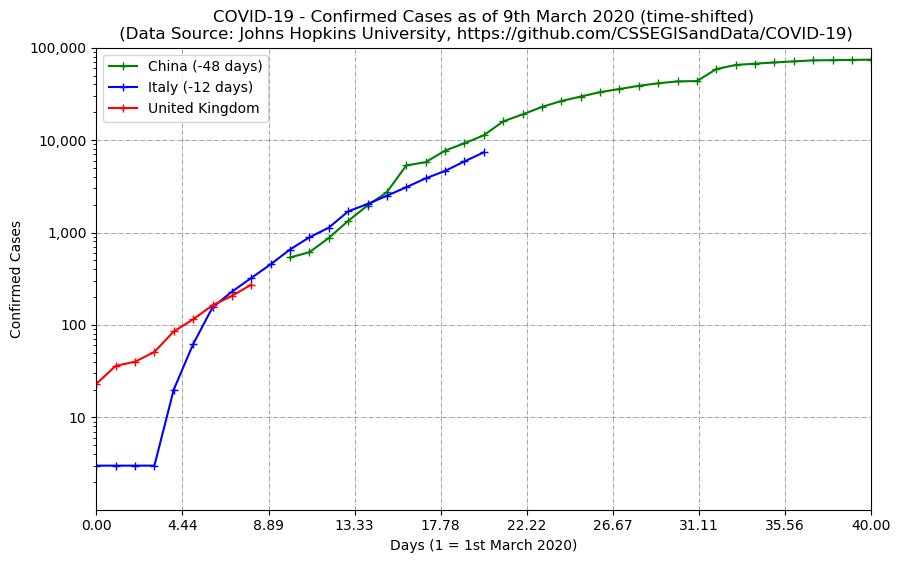

In [102]:
# Confirmed Cases
plt.figure(figsize=(10,6))
plt.plot(covid_confirmed_days+48,df_cases_china,'g+-')
plt.plot(covid_confirmed_days+12,df_cases_italy,'b+-')
plt.plot(covid_confirmed_days,df_cases_uk,'r+-')
#plt.plot(covid_confirmed_days+15,df_cases_skorea,'k-')
#plt.plot(covid_confirmed_days+4,df_cases_france,'k-')
#plt.plot(covid_confirmed_days+4,df_cases_germany,'k-')
#plt.plot(covid_confirmed_days-6,df_cases_india,'k-')
#plt.plot(covid_confirmed_days+2,df_cases_spain,'k-')
#plt.plot(covid_confirmed_days+10,df_cases_iran,'k-')
#plt.plot(covid_confirmed_days,df_cases_switzerland,'k-')
#plt.plot(covid_confirmed_days-15,df_cases_southafrica,'k-')
#plt.plot(covid_confirmed_days-5,df_cases_czechrepublic,'k-')
#plt.plot(covid_confirmed_days-4,df_cases_australia,'k-')
#plt.plot(covid_confirmed_days-4,df_cases_hongkong,'k-')
#plt.plot(covid_confirmed_days-1,df_cases_sweden,'k-')
#plt.plot(covid_confirmed_days+14,df_cases_japan,'k-')
#plt.plot(covid_confirmed_days+0,df_cases_norway,'k-')
#plt.plot(covid_confirmed_days-1,df_cases_belgium,'k-')
#plt.plot(covid_confirmed_days+48,df_cases_world,'+-.')
plt.grid(linestyle='-.', linewidth='0.5', color='gray')
plt.yscale('log')
plt.ylim(1,1e5)
plt.xlim(0,40)
plt.xticks(np.linspace(0,40,10))
plt.yticks([10,100,1000,10000,1e5],['10','100','1,000','10,000','100,000'])
plt.xlabel('Days (1 = 1st March 2020)')
plt.ylabel('Confirmed Cases')
#plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','USA (-2dy)','S. Korea (-15dy)','China (-48dy)','Iran (-10dy)','India (+2dy)','United Kingdom'])
plt.legend(['China (-48 days)','Italy (-12 days)','United Kingdom'])
plt.title('COVID-19 - Confirmed Cases as of 9th March 2020 (time-shifted)\n (Data Source: Johns Hopkins University, https://github.com/CSSEGISandData/COVID-19)')
plt.savefig("coronaviruscases.png")

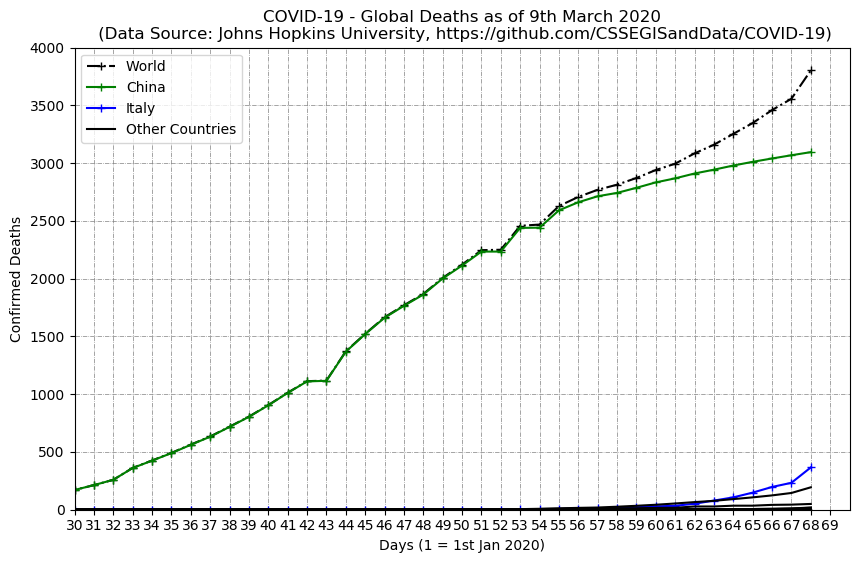

In [105]:
# Confirmed Deaths
plt.figure(figsize=(10,6))
plt.plot(covid_death_days,df_deaths_world,'k+-.')
plt.plot(covid_death_days,df_deaths_china,'g+-')
plt.plot(covid_death_days,df_deaths_italy,'b+-')
plt.plot(covid_death_days,df_deaths_skorea,'k-')
plt.plot(covid_death_days,df_deaths_france,'k-')
plt.plot(covid_death_days,df_deaths_germany,'k-')
plt.plot(covid_death_days,df_deaths_india,'k-')
plt.plot(covid_death_days,df_deaths_spain,'k-')
plt.plot(covid_death_days,df_deaths_iran,'k-')
plt.plot(covid_death_days,df_deaths_switzerland,'k-')
plt.plot(covid_death_days,df_deaths_southafrica,'k-')
plt.plot(covid_death_days,df_deaths_czechrepublic,'k-')
plt.plot(covid_death_days,df_deaths_uk,'k-')
plt.plot(covid_death_days,df_deaths_australia,'k-')
plt.plot(covid_death_days,df_deaths_hongkong,'k-')
plt.plot(covid_death_days,df_deaths_sweden,'k-')
plt.plot(covid_death_days,df_deaths_japan,'k-')
plt.plot(covid_death_days,df_deaths_norway,'k-')
plt.plot(covid_death_days,df_deaths_belgium,'k-')

plt.grid(linestyle='-.', linewidth='0.5', color='gray')
#plt.yscale('log')
#plt.ylim(1,1e3)
#plt.xlim(1,31+29+31)
#plt.xticks(np.arange(0,31+29+31,10))
#plt.yticks([1,10,100,1000,10000],['1','10','100','1,000','10,000'])
plt.ylim(0,4000)
plt.xlim(30,70)
plt.xticks(np.arange(30,70,1))
#plt.yticks([1,10,100,1000,10000],['1','10','100','1,000','10,000'])
plt.xlabel('Days (1 = 1st Jan 2020)')
plt.ylabel('Confirmed Deaths')
#plt.legend(['Italy (-12dy)','Germany (-4dy)','France (-4dy)','USA (-2dy)','S. Korea (-15dy)','China (-48dy)','Iran (-10dy)','India (+2dy)','United Kingdom'])
plt.legend(['World','China','Italy','Other Countries'])
plt.title('COVID-19 - Global Deaths as of 9th March 2020\n (Data Source: Johns Hopkins University, https://github.com/CSSEGISandData/COVID-19)')
plt.savefig("coronavirusdeaths.png")